In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def marcenko_pastur(T, N):
    """
        Compute the bounds and density of the Marcenko-Pastur distribution for a random matrix.

    Parameters:
        T (int): Number of samples.
        N (int): Number of features.

    Returns:
        tuple: (lambda_min, lambda_max), the bounds of the Marcenko-Pastur distribution.
        function: rho(x), the density function of the Marcenko-Pastur distribution.
    """
    q = N / float(T)
    lambda_min = (1 - np.sqrt(q))**2
    lambda_max = (1 + np.sqrt(q))**2

    def rho(x):
        ret = np.sqrt((lambda_max - x) * (x - lambda_min)) / (2 * np.pi * q * x)
        if q <= 1:
            return ret if lambda_min < x < lambda_max else 0.0
        return 1 - 1 / q if x == 0 else (ret if lambda_min < x < lambda_max else 0.0)

    return (lambda_min, lambda_max), rho


def compute_H(X, norm_cdf):
    """
        Corresponds to the matrix denoted H in the paper.
    """

    T, N = X.shape
    T_aug = int(T * (T-1) / 2)
    X_aug = np.zeros((T_aug, N))
    compt = 0
    for i in range(T-1):
        for j in range(i+1, T):
            X_aug[compt] = np.sign(X[i] - X[j]) - 2 * norm_cdf[i] + 2 * norm_cdf[j]
            compt += 1 
    A_ij = 1/T_aug * X_aug.T @ X_aug
    return A_ij

# Figure 1 

q = 17.5
q'= 0.5


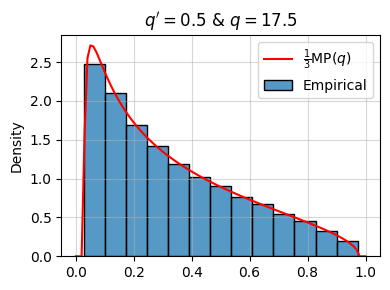

In [ ]:
np.random.seed(42)
T, N = 70, 1225

X = np.random.randn(T, N)
norm_cdf = norm.cdf(X)
T_aug = int(T * (T-1) / 2)
_, func_mp = marcenko_pastur(T_aug, N)
xs = np.linspace(0, 1, 100)
mp_y = 3 * np.array([func_mp(3*x) for x in xs])
print("q =", N/T)
print("q'=", np.round(N/T_aug,1))

# Plot
plt.figure(figsize=(4,3))
plt.plot(xs, mp_y, label=r'$\frac{1}{3}$MP($q$)', color='red')
eigvals_A_ij = np.linalg.eigvalsh(compute_H(X, norm_cdf))
sns.histplot(eigvals_A_ij, stat='density', bins=13, label='Empirical')
plt.title(r"$q'=0.5$ & $q=17.5$")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Figure 2 

q =  4.29
q'=  0.12


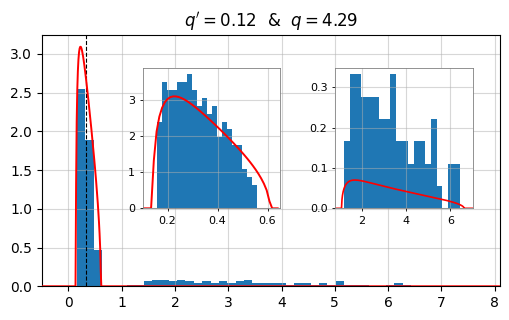

In [ ]:
np.random.seed(42)
T, N = 70, 300
T_aug = int(T * (T - 1) / 2)

_, func_mp = marcenko_pastur(T_aug, N)
xs = np.linspace(-1, 10, 1000)
mp_y = 3 * np.array([func_mp(3 * x) for x in xs])
_, func_mp = marcenko_pastur(T, N)
mp_y_lin = 3/2 * np.array([func_mp(3 * (x - 1/3) / 2) for x in xs])
gamma = N / T
q = N / T_aug
print("q = ", np.round(gamma, 2))
print("q'= ", np.round(q, 2))

## Plot
plt.figure(figsize=(5.2, 3.3)) 
ax = plt.gca()

# Theoretical
ax.plot(xs, mp_y, label=r'$\frac{1}{3}\!\cdot\!\mathrm{MP}(q)$', color='red',  lw=1.4, zorder=3)

# Empirical 
evals = pd.Series(
    np.linalg.eigvalsh(pd.DataFrame(np.random.randn(T, N)).corr(method="kendall"))
)
ax.hist(evals, bins=40, density=True)

ax.axvline(1/3, ls="--", color="black", lw=0.8, label=r'$1/3$', zorder=2)
ax.set_xlim(-0.5, None)
ax.set_title(rf"$q'={np.round(q,2)}$  &  $q={np.round(gamma,2)}$")
ax.grid(True, alpha=0.5)
ax.set_xlim((-0.5, 8.1))

## Insets
x0a, x1a = 0.1, 0.65 
x0b, x1b = 0.8, 7.
axins1 = ax.inset_axes([0.22, 0.31, 0.3, 0.56]) 
axins2 = ax.inset_axes([0.64, 0.31, 0.3, 0.56])

# Left-inset
mask1 = (xs >= x0a) & (xs <= x1a)
axins1.plot(xs[mask1], mp_y[mask1], color='red', lw=1.4)
axins1.hist(evals[(evals >= x0a) & (evals <= x1a)], bins=20, density=True)
axins1.set_xlim(x0a, x1a)
axins1.margins(x=0)
axins1.grid(True, alpha=0.5)
axins1.set_facecolor("white")
for s in axins1.spines.values():
    s.set_linewidth(0.6)
    s.set_edgecolor("0.5")
axins1.tick_params(labelsize=8, width=0.6, length=2)

# Right-inset
mask2 = (xs >= x0b) & (xs <= x1b)
axins2.plot(xs[mask2], mp_y_lin[mask2], color='red', lw=1.2)
axins2.hist(evals[(evals >= x0b) & (evals <= x1b)], bins=20, density=True)
axins2.axvline(1/3, ls="--", color="black", lw=0.8)
axins2.set_xlim(x0b, x1b)
axins2.margins(x=0)
axins2.grid(True, alpha=0.5)
axins2.set_facecolor("white")
for s in axins2.spines.values():
    s.set_linewidth(0.6)
    s.set_edgecolor("0.5")
axins2.tick_params(labelsize=8, width=0.6, length=2)

plt.tight_layout()
plt.show()

q =  8.57
q'=  0.25


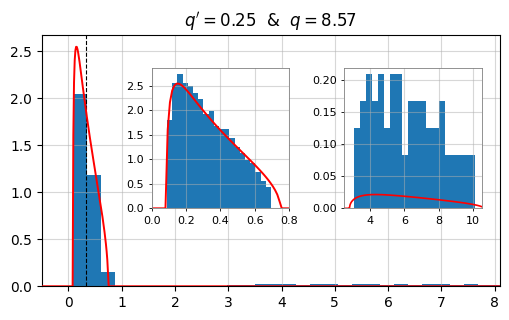

In [ ]:
np.random.seed(42)
T, N = 70, 600
T_aug = int(T * (T - 1) / 2)

_, func_mp = marcenko_pastur(T_aug, N)
xs = np.linspace(-1, 12, 1000)
mp_y = 3 * np.array([func_mp(3 * x) for x in xs])
_, func_mp = marcenko_pastur(T, N)
mp_y_lin = 3/2 * np.array([func_mp(3 * (x - 1/3) / 2) for x in xs])
gamma = N / T
q = N / T_aug
print("q = ", np.round(gamma, 2))
print("q'= ", np.round(q, 2))

## Plot
plt.figure(figsize=(5.2, 3.3))  
ax = plt.gca()

# Theoretical
ax.plot(xs, mp_y, label=r'$\frac{1}{3}\!\cdot\!\mathrm{MP}(q)$', color='red',  lw=1.4, zorder=3)

# Empirical
evals = pd.Series(
    np.linalg.eigvalsh(pd.DataFrame(np.random.randn(T, N)).corr(method="kendall"))
)
ax.hist(evals, bins=40, density=True)

ax.axvline(1/3, ls="--", color="black", lw=0.8, label=r'$1/3$', zorder=2)
ax.set_xlim(-0.5, None)
ax.set_title(rf"$q'={np.round(q,2)}$  &  $q={np.round(gamma,2)}$")
ax.grid(True, alpha=0.5)
ax.set_xlim((-0.5, 8.1))

## Insets
x0a, x1a = 0., 0.8  
x0b, x1b = 2.5, 10.5 
axins1 = ax.inset_axes([0.24, 0.31, 0.3, 0.56]) 
axins2 = ax.inset_axes([0.66, 0.31, 0.3, 0.56]) 

# Left-inset
mask1 = (xs >= x0a) & (xs <= x1a)
axins1.plot(xs[mask1], mp_y[mask1], color='red', lw=1.4) 
axins1.hist(evals[(evals >= x0a) & (evals <= x1a)], bins=20, density=True)
axins1.set_xlim(x0a, x1a)
axins1.margins(x=0)
axins1.grid(True, alpha=0.5)
axins1.set_facecolor("white")
for s in axins1.spines.values():
    s.set_linewidth(0.6)
    s.set_edgecolor("0.5")
axins1.tick_params(labelsize=8, width=0.6, length=2)

# Right-inset
mask2 = (xs >= x0b) & (xs <= x1b)
axins2.plot(xs[mask2], mp_y_lin[mask2], color='red', lw=1.2)
axins2.hist(evals[(evals >= x0b) & (evals <= x1b)], bins=20, density=True)
axins2.axvline(1/3, ls="--", color="black", lw=0.8)
axins2.set_xlim(x0b, x1b)
axins2.margins(x=0)
axins2.grid(True, alpha=0.5)
axins2.set_facecolor("white")
for s in axins2.spines.values():
    s.set_linewidth(0.6)
    s.set_edgecolor("0.5")
axins2.tick_params(labelsize=8, width=0.6, length=2)

plt.tight_layout()
plt.show()